# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading the Dataset**

In [ ]:
import pandas as pd
import numpy
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/houses_to_rent.csv'
data= pd.read_csv(path)
print(data)
data.head()
data.shape
data.info()

Mounted at /content/drive
                 city  area  ...  fire insurance (R$)  total (R$)
0           São Paulo    70  ...                   42        5618
1           São Paulo   320  ...                   63        7973
2        Porto Alegre    80  ...                   41        3841
3        Porto Alegre    51  ...                   17        1421
4           São Paulo    25  ...                   11         836
...               ...   ...  ...                  ...         ...
10687    Porto Alegre    63  ...                   22        1926
10688       São Paulo   285  ...                  191       19260
10689  Rio de Janeiro    70  ...                   78        7390
10690  Rio de Janeiro   120  ...                  155       14020
10691       São Paulo    80  ...                   22        1587

[10692 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtyp

# **Encoding**

In [ ]:
data['floor'] = data['floor'].replace(to_replace = '-' , value =np.nan)
data['floor'] = data['floor'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data['animal'].fillna(value=data['animal'].mode()[0], inplace=True)
data['animal']= data["animal"].replace("acept", "1")
data['animal']= data["animal"].replace("not acept", "0")
data['animal'] = data['animal'].astype(int)
data['furniture'].fillna(value=data['furniture'].mode()[0], inplace=True)
data['furniture']= data["furniture"].replace("furnished", "1")
data['furniture']= data["furniture"].replace("not furnished", "0")
data['furniture'] = data['furniture'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  int64  
 7   furniture            10692 non-null  int64  
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,8231.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,6.583283,0.777778,0.243734,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.153925,0.415759,0.429354,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.000000,1.000000,0.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,9.000000,1.000000,0.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
data['floor'] = data['floor'].replace(np.nan, 0)
data['floor'] = data['floor'].astype(int)
data['city'].fillna(value=data['city'].mode()[0], inplace=True)
data['city']= data['city'].replace("Belo Horizonte", "0")
data['city']= data['city'].replace("Campinas", "1")
data['city']= data['city'].replace("Porto Alegre", "2")
data['city']= data['city'].replace("Rio de Janeiro", "3")
data['city']= data['city'].replace("São Paulo", "4")
data['city'] = data['city'].astype(int)

In [ ]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   city                 10692 non-null  int64
 1   area                 10692 non-null  int64
 2   rooms                10692 non-null  int64
 3   bathroom             10692 non-null  int64
 4   parking spaces       10692 non-null  int64
 5   floor                10692 non-null  int64
 6   animal               10692 non-null  int64
 7   furniture            10692 non-null  int64
 8   hoa (R$)             10692 non-null  int64
 9   rent amount (R$)     10692 non-null  int64
 10  property tax (R$)    10692 non-null  int64
 11  fire insurance (R$)  10692 non-null  int64
 12  total (R$)           10692 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


# **Removing Duplicate Values**

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

358


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
244,2,47,1,1,1,1,0,1,400,2200,0,33,2633
920,0,40,1,1,1,2,0,1,0,970,0,13,983
1060,4,136,3,3,3,13,1,0,1430,4206,364,54,6054
1064,4,20,1,1,0,5,1,1,602,1800,130,23,2555
1108,1,184,4,3,4,0,1,0,0,3240,220,49,3509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,2,40,1,1,1,9,0,1,1300,1200,68,18,2586
10569,0,20,1,1,1,0,1,1,0,1100,0,15,1115
10623,2,47,1,1,1,1,0,1,400,2200,0,33,2633
10640,4,27,1,1,0,5,0,0,1405,3500,1,45,4951


In [ ]:
data.drop_duplicates(inplace=True)
dp1 = data.duplicated()
dp1.sum()

0

# **Removing Outliers**

<function matplotlib.pyplot.show>

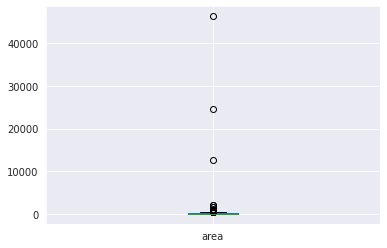

In [ ]:
data.boxplot(column=["area"])
plt.show


In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lowarea,upparea=remove_outlier(data['area'])
data['area']=np.where(data['area']>upparea,upparea,data['area'])
data['area']=np.where(data['area']<lowarea,lowarea,data['area'])

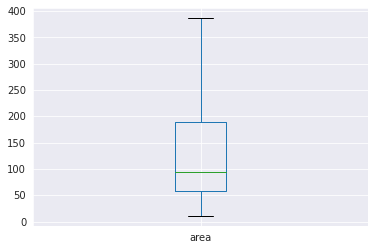

In [ ]:
data.boxplot(column=['area'])
plt.show()

<function matplotlib.pyplot.show>

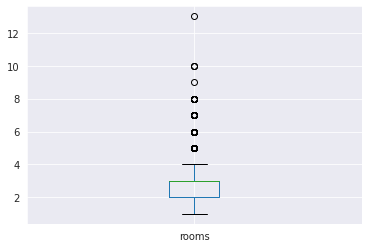

In [ ]:
data.boxplot(column=["rooms"])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['rooms'])
data['rooms']=np.where(data['rooms']>upparea,upparea,data['rooms'])
data['rooms']=np.where(data['rooms']<lowarea,lowarea,data['rooms'])

<function matplotlib.pyplot.show>

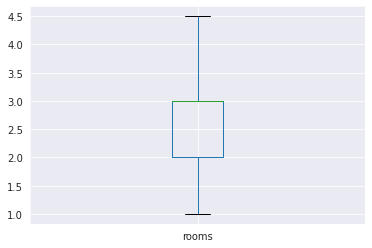

In [ ]:
data.boxplot(column=["rooms"])
plt.show

<function matplotlib.pyplot.show>

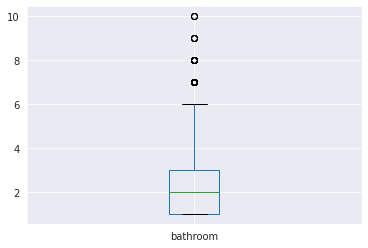

In [ ]:
data.boxplot(column=["bathroom"])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['bathroom'])
data['bathroom']=np.where(data['bathroom']>upparea,upparea,data['bathroom'])
data['bathroom']=np.where(data['bathroom']<lowarea,lowarea,data['bathroom'])

<function matplotlib.pyplot.show>

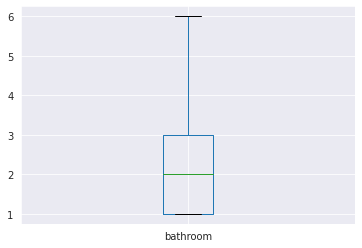

In [ ]:
data.boxplot(column=["bathroom"])
plt.show

<function matplotlib.pyplot.show>

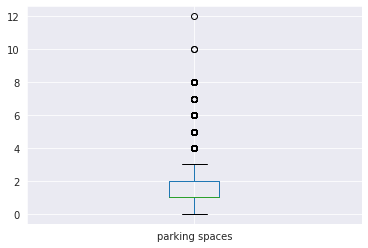

In [ ]:
data.boxplot(column=["parking spaces"])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['parking spaces'])
data['parking spaces']=np.where(data['parking spaces']>upparea,upparea,data['parking spaces'])
data['parking spaces']=np.where(data['parking spaces']<lowarea,lowarea,data['parking spaces'])

<function matplotlib.pyplot.show>

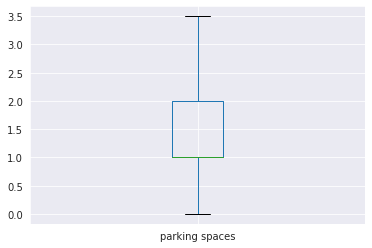

In [ ]:
data.boxplot(column=["parking spaces"])
plt.show

<function matplotlib.pyplot.show>

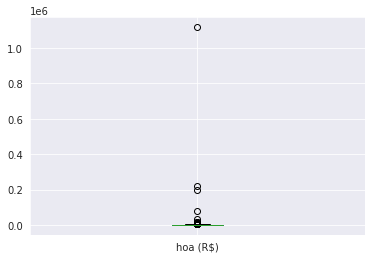

In [ ]:
data.boxplot(column=['hoa (R$)'])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['hoa (R$)'])
data['hoa (R$)']=np.where(data['hoa (R$)']>upparea,upparea,data['hoa (R$)'])
data['hoa (R$)']=np.where(data['hoa (R$)']<lowarea,lowarea,data['hoa (R$)'])

<function matplotlib.pyplot.show>

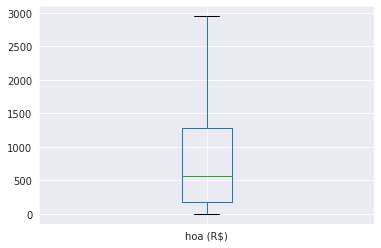

In [ ]:
data.boxplot(column=['hoa (R$)'])
plt.show

<function matplotlib.pyplot.show>

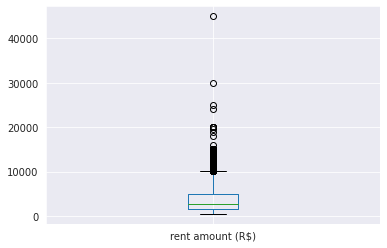

In [ ]:
data.boxplot(column=['rent amount (R$)'])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['rent amount (R$)'])
data['rent amount (R$)']=np.where(data['rent amount (R$)']>upparea,upparea,data['rent amount (R$)'])
data['rent amount (R$)']=np.where(data['rent amount (R$)']<lowarea,lowarea,data['rent amount (R$)'])

<function matplotlib.pyplot.show>

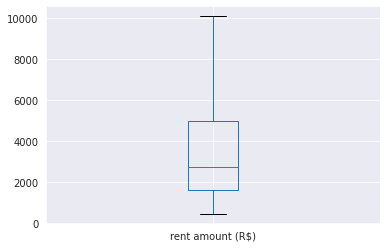

In [ ]:
data.boxplot(column=['rent amount (R$)'])
plt.show

<function matplotlib.pyplot.show>

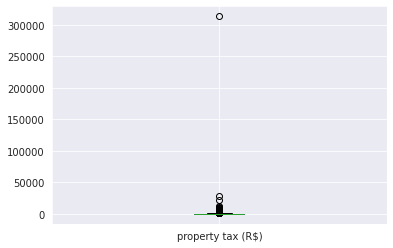

In [ ]:
data.boxplot(column=['property tax (R$)'])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['rent amount (R$)'])
data['rent amount (R$)']=np.where(data['rent amount (R$)']>upparea,upparea,data['rent amount (R$)'])
data['rent amount (R$)']=np.where(data['rent amount (R$)']<lowarea,lowarea,data['rent amount (R$)'])

<function matplotlib.pyplot.show>

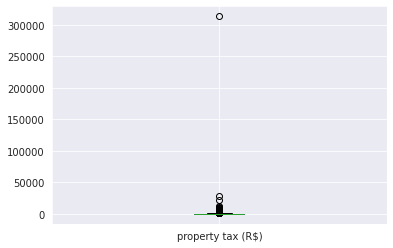

In [ ]:
data.boxplot(column=['property tax (R$)'])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['property tax (R$)'])
data['property tax (R$)']=np.where(data['property tax (R$)']>upparea,upparea,data['property tax (R$)'])
data['property tax (R$)']=np.where(data['property tax (R$)']<lowarea,lowarea,data['property tax (R$)'])

<function matplotlib.pyplot.show>

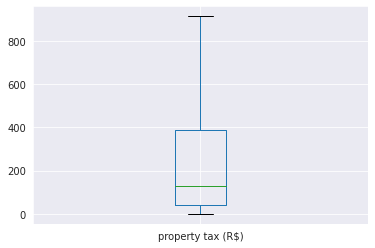

In [ ]:
data.boxplot(column=['property tax (R$)'])
plt.show

<function matplotlib.pyplot.show>

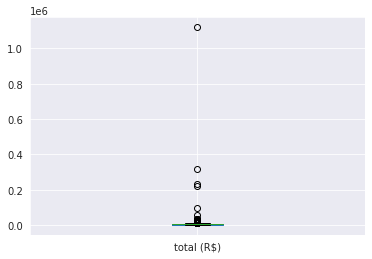

In [ ]:
data.boxplot(column=['total (R$)'])
plt.show

In [ ]:
lowarea,upparea=remove_outlier(data['total (R$)'])
data['total (R$)']=np.where(data['total (R$)']>upparea,upparea,data['total (R$)'])
data['total (R$)']=np.where(data['total (R$)']<lowarea,lowarea,data['total (R$)'])

<function matplotlib.pyplot.show>

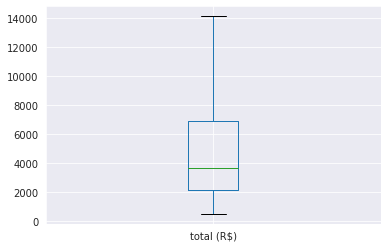

In [ ]:
data.boxplot(column=['total (R$)'])
plt.show

# **Correlation Matrix**

In [ ]:
data.corr()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,1.000000,0.039877,-0.041941,0.089178,0.050968,0.111192,-0.014973,0.111979,0.211522,0.210799,0.175702,0.149550,0.230544
area,0.039877,1.000000,0.759739,0.807250,0.700413,-0.092020,0.140921,-0.011150,0.319593,0.725001,0.712812,0.729693,0.731084
rooms,-0.041941,0.759739,1.000000,0.737319,0.650453,-0.071093,0.172407,-0.078467,0.317944,0.571344,0.592818,0.556393,0.585702
bathroom,0.089178,0.807250,0.737319,1.000000,0.712023,0.004482,0.115648,0.023490,0.406791,0.697012,0.696778,0.673314,0.722381
parking spaces,0.050968,0.700413,0.650453,0.712023,1.000000,0.020427,0.128349,0.004640,0.352652,0.608869,0.632397,0.582593,0.625632
floor,0.111192,-0.092020,-0.071093,0.004482,0.020427,1.000000,-0.033619,0.115293,0.354856,0.080326,0.071053,0.009841,0.140443
animal,-0.014973,0.140921,0.172407,0.115648,0.128349,-0.033619,1.000000,-0.081020,0.016595,0.068698,0.092810,0.076535,0.066065
furniture,0.111979,-0.011150,-0.078467,0.023490,0.004640,0.115293,-0.081020,1.000000,0.154186,0.183806,0.060863,0.144082,0.179531
hoa (R$),0.211522,0.319593,0.317944,0.406791,0.352652,0.354856,0.016595,0.154186,1.000000,0.451991,0.550024,0.333669,0.627374
rent amount (R$),0.210799,0.725001,0.571344,0.697012,0.608869,0.080326,0.068698,0.183806,0.451991,1.000000,0.702031,0.952494,0.962869


In [ ]:
print(data)

       city   area  rooms  ...  property tax (R$)  fire insurance (R$)  total (R$)
0         4   70.0    2.0  ...            211.000                   42      5618.0
1         4  320.0    4.0  ...            912.875                   63      7973.0
2         2   80.0    1.0  ...              0.000                   41      3841.0
3         2   51.0    2.0  ...             22.000                   17      1421.0
4         4   25.0    1.0  ...             25.000                   11       836.0
...     ...    ...    ...  ...                ...                  ...         ...
10687     2   63.0    2.0  ...             24.000                   22      1926.0
10688     4  285.0    4.0  ...            912.875                  191     14106.0
10689     3   70.0    3.0  ...            332.000                   78      7390.0
10690     3  120.0    2.0  ...            279.000                  155     14020.0
10691     4   80.0    2.0  ...            165.000                   22      1587.0

[10

# **Fitting the Model**

In [ ]:
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
metrics = [] 
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression() 
reg.fit(x_train, y_train) 
predict = reg.predict(x_test)

x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())

print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.819e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:26:02   Log-Likelihood:                -54908.
No. Observations:                7233   AIC:                         1.098e+05
Df Residuals:                    7220   BIC:                         1.099e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.1995     22.861     -3.246      0.0

# **Plotting the Graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


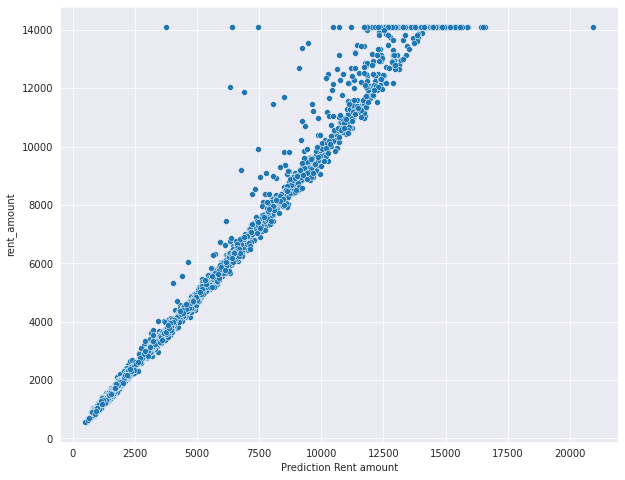

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Prediction Rent amount', fontsize = 10)
plt.ylabel('rent_amount', fontsize = 10)

sns.scatterplot(predict, y_test)